# OpenCV

In [1]:
print("hello world")

hello world


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
cv2.__version__

'4.10.0'

## Images

I would like to read the following image located at _Images/dawn.jpg_

<img src="Images/dawn.jpg" width=300>

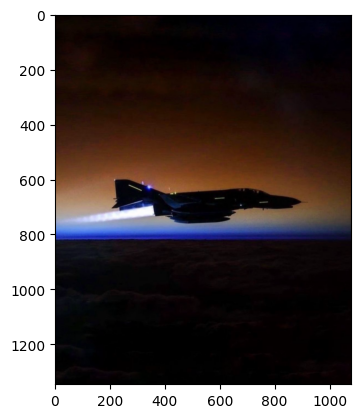

In [4]:
img= cv2.imread("Images/dawn.jpg",-1)

plt.imshow(img) #OpenCV reads image in BRG format, we have it in RGB format

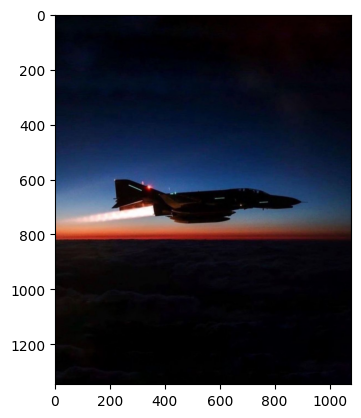

In [5]:
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Converting from BGR to RGB

plt.imshow(rgb_img)

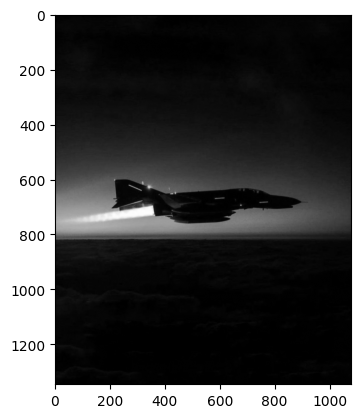

In [6]:
img=cv2.imread("Images/dawn.jpg",1)

bw_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(bw_img, cmap="gray")

In [7]:
img.shape

(1346, 1080, 3)

In [8]:
img.size

4361040

## Basic Operations with Images

### Accessing Particular Colours

Let us try to break down the components of the following image:

<img src="Images/rbg.jpg" width=300>

In [9]:
img2 =  cv2.imread("Images/rbg.jpg",-1)

#### Method 1

Text(0.5, 1.0, 'R')

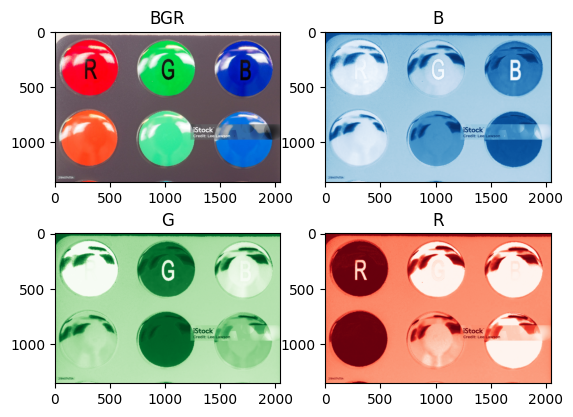

In [10]:
img2_blue = img2[:,:,0]
img2_green = img2[:,:,1]
img2_red= img2[:,:,2]

plt.subplot(2,2,1)
plt.imshow(img2[:,:,::-1])  #This addition changes BGR to RGB format
plt.title("BGR")

plt.subplot(2,2,2)
plt.imshow(img2_blue,cmap="Blues")
plt.title("B")

plt.subplot(2,2,3)
plt.imshow(img2_green,cmap="Greens")
plt.title("G")

plt.subplot(2,2,4)
plt.imshow(img2_red,cmap="Reds")
plt.title("R")

#### Method 2

Text(0.5, 1.0, 'R')

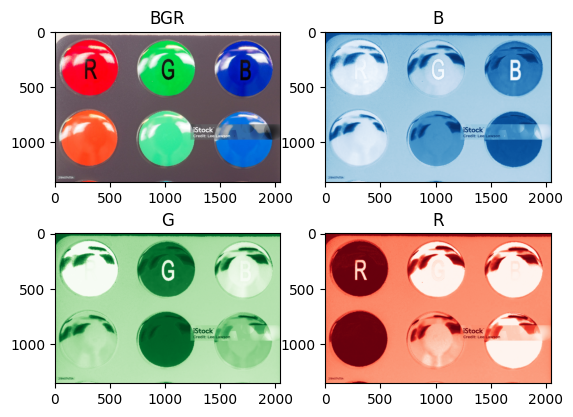

In [11]:
B, G, R = cv2.split(img2) #As the name suggests, the split function splits the image to it's constituent colours

plt.subplot(2,2,1)
plt.imshow(img2[:,:,::-1])
plt.title("BGR")

plt.subplot(2,2,2)
plt.imshow(B,cmap="Blues")
plt.title("B")

plt.subplot(2,2,3)
plt.imshow(G,cmap="Greens")
plt.title("G")

plt.subplot(2,2,4)
plt.imshow(R,cmap="Reds")
plt.title("R")

### Looking at a region of an Image

Let us see how we can access a particular area of the following image

<img src="Images/rbg.jpg" width=300>

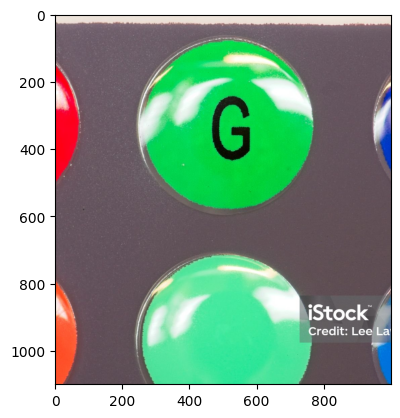

In [12]:
img2_region = img2[0:1100,500:1500]  #This helps us look at a region of interest

plt.imshow(img2_region[:,:,::-1])

### Rescaling an Image

In [13]:
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1]*scale)
    height= int(frame.shape[0]*scale)
    dimensions = (width, height)       #We shall learn about interpolation later in the notebook
                                       
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

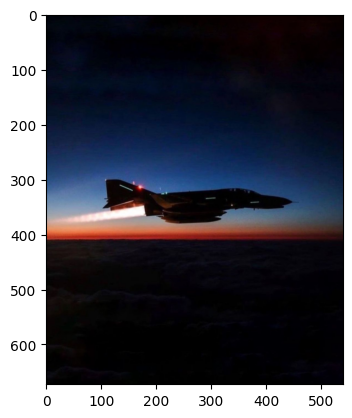

In [14]:
resized_img= rescaleFrame(img,0.50)              
plt.imshow(resized_img[:,:,::-1])                #Notice the axis values in the resulting plot

## Arithmetic Operations with Images

### Adding together Images

We have the following two images that we want to add together. Note that it is important for the images to be of the same size and same depth.

<img src="Images/space.jpg" width=300>

<img src="Images/city.jpg" width=300>

In [15]:
img_space = cv2.imread("Images/space.jpg",-1)

img_city = cv2.imread("Images/city.jpg",-1)

In [16]:
print(img_space.shape),

print(img_city.shape)

(426, 640, 3)
(426, 640, 3)


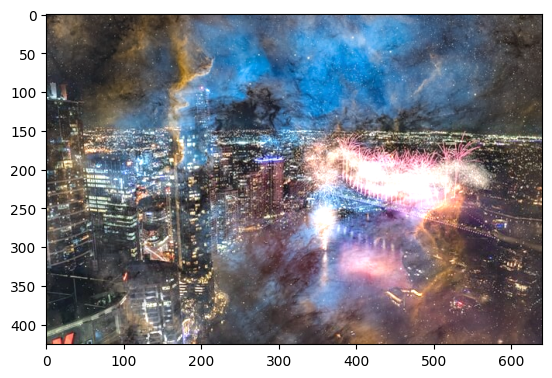

In [17]:
img_space_and_city = cv2.add(img_space,img_city)  #This just adds pixels of each image together
  
plt.imshow(img_space_and_city[:,:,::-1])      #Not of much use as adding pixels is not ideal, we might want more of one image

_cv2.addWeighted()_ function has three parameters, alpha is the weight of first image, beta is the weight of second image and gamma is the measurement of light. 

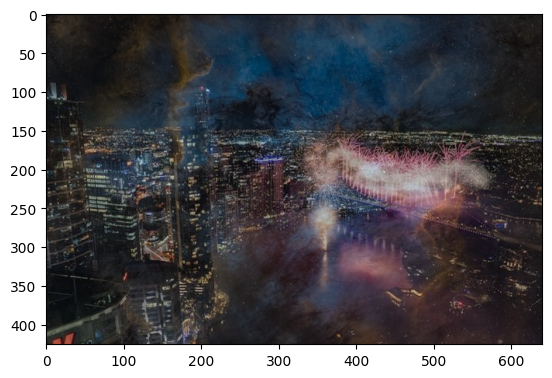

In [18]:
img_space_and_city_weighted = cv2.addWeighted(img_space,0.4,img_city,0.6,0)

plt.imshow(img_space_and_city_weighted[:,:,::-1])

### Subtracting Images

I want to subtract the following images

<img src="Images/white.jpg" width=300>

<img src="Images/whitecircle.jpg" width=300>


In [19]:
img_white = cv2.imread("Images/white.jpg",-1)

img_whitecircle = cv2.imread("Images/whitecircle.jpg",-1)

In [20]:
print(img_white.shape),

print(img_whitecircle.shape)

(260, 555)
(260, 555)


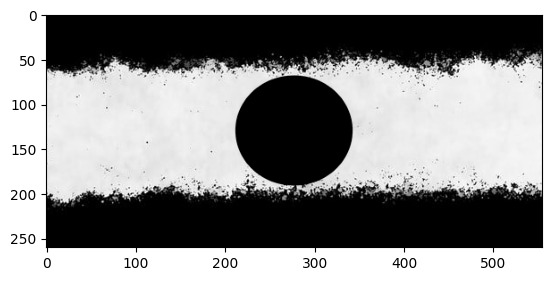

In [21]:
img_whitecircle_from_white = cv2.subtract(img_white, img_whitecircle)

plt.imshow(img_whitecircle_from_white, cmap="gray")

### Bitwise Operations

Bitwise operations in images include:
+ AND
+ OR
+ XOR
+ NOT

Both the inputs are single channel images

_Note: For bitwise operations to be applied, the images must be of same dimensions._

We shall apply bitwise operations in the following images:

<img src="Images/whitecircle.jpg" width='300'>

<img src="Images/bwdiagonal.jpg" width='300'>

##### AND

AND gives the bitwise conjuction of the input images

In [22]:
img_bwdiagonal = cv2.imread("Images/bwdiagonal.jpg",-1)

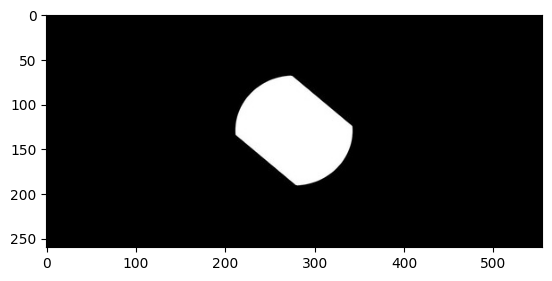

In [23]:
img_bwdiagonal_AND_whitecircle = cv2.bitwise_and(img_bwdiagonal,img_whitecircle)

plt.imshow(img_bwdiagonal_AND_whitecircle, cmap="gray")

##### OR

OR gives bitwise disjunciton of the inputs

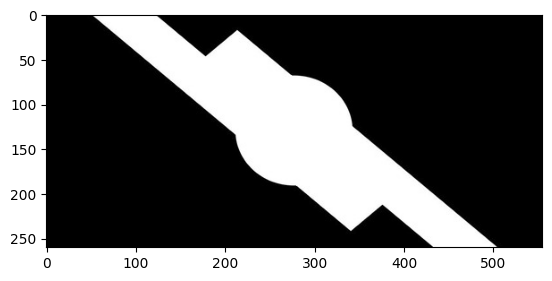

In [24]:
img_bwdiagonal_OR_whitecircleg = cv2.bitwise_or(img_bwdiagonal,img_whitecircle)

plt.imshow(img_bwdiagonal_OR_whitecircleg, cmap="gray")

##### XOR

XOR gives bitwise exclusive-OR operation on the input

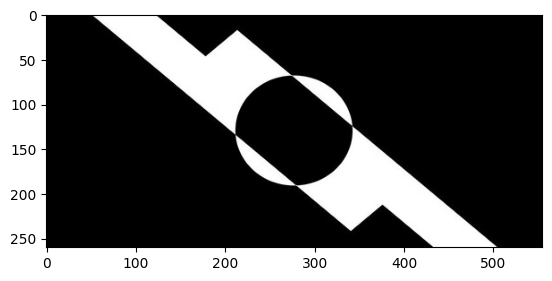

In [25]:
img_bwdiagonal_XOR_whitecircleg = cv2.bitwise_xor(img_bwdiagonal,img_whitecircle)

plt.imshow(img_bwdiagonal_XOR_whitecircleg, cmap="gray")

##### NOT

NOT gives inversion of input element

Text(0.5, 1.0, 'NOT on whitecircle')

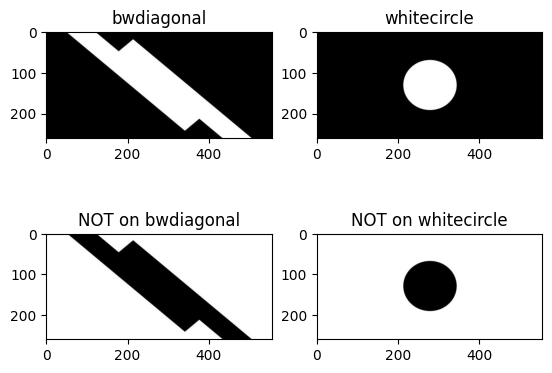

In [26]:
img_bwdiagonal_NOT = cv2.bitwise_not(img_bwdiagonal)

img_whitecircle_NOT = cv2.bitwise_not(img_whitecircle)

plt.subplot(2,2,1)
plt.imshow(img_bwdiagonal, cmap='gray')
plt.title("bwdiagonal")

plt.subplot(2,2,2)
plt.imshow(img_whitecircle, cmap="gray")
plt.title("whitecircle")

plt.subplot(2,2,3)
plt.imshow(img_bwdiagonal_NOT, cmap='gray')
plt.title("NOT on bwdiagonal")

plt.subplot(2,2,4)
plt.imshow(img_whitecircle_NOT, cmap="gray")
plt.title("NOT on whitecircle")

## Image Processing

### Resizing Images

We have few choice for interpolation methods while resizing using opencv:
+ cv2.INTER_AREA : Used while shrinking
+ cv2.INTER_CUBIC : A slower but more efficient approach
+ cv2.INTER_LINEAR : Used when zooming is required

syntax: cv2.resize(source, dsize, dest, fx, fy, interpolaiton)

The parameters are as follows:

+ source: Input Image
+ dsize: Size of output array
+ dest: Output array
+ fx: Scale factor in the x-axis
+ fy: Scale factor in the y-axis
+ Interpolation: One of the above mentioned

We shall use the following image to demostrate resizing:

<img src="Images/dawn.jpg" width=300>

In [27]:
img.shape

(1346, 1080, 3)

Text(0.5, 1.0, 'Nearest')

<Figure size 640x480 with 0 Axes>

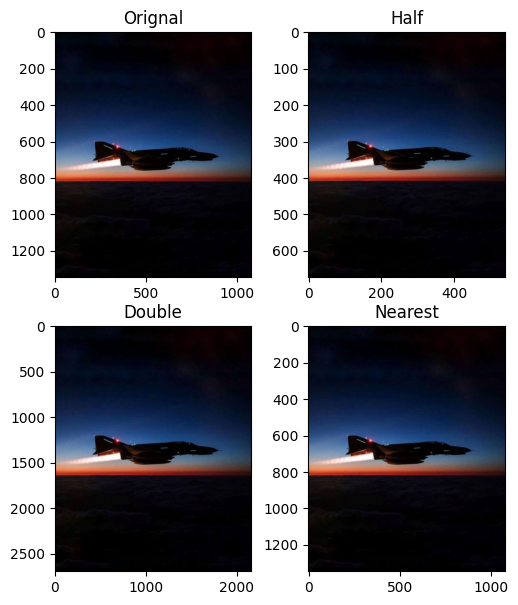

In [28]:
img_half = cv2.resize(img, (0,0), fx=0.5, fy= 0.5) #The output is half the size of input

img_double = cv2.resize(img, (2160,2692))     #The output is double the size of input

img_nearest = cv2.resize(img, (1080, 1346), interpolation= cv2.INTER_LINEAR)

plt.subplots_adjust(hspace=0.4, wspace=0)
plt.subplots(2,2,figsize=(6,7))

plt.subplot(2,2,1)
plt.imshow(img[:,:,::-1])
plt.title("Orignal")

plt.subplot(2,2,2)
plt.imshow(img_half[:,:,::-1])
plt.title("Half")

plt.subplot(2,2,3)
plt.imshow(img_double[:,:,::-1])
plt.title("Double")

plt.subplot(2,2,4)
plt.imshow(img_nearest[:,:,::-1])
plt.title("Nearest")

### Eroding Images